# Лабораторная работа № 1
## Хапчаев Тимур Русланович M32071
### Задание 1 (вариант 3)

Воспользуемся неравенством Чебышёва:
<br>
$P(|\overline{X} - \mu| \leq \epsilon) \geq 1 - \frac{\text{Var}(\overline{X})}{\epsilon^2}$<br>
<br>
$\text{Var}(\overline{X}) = \frac{\text{Var(X_i)}}{n} = \frac{1}{n} * \frac{1 - p}{p^2}$<br>
<br>
$P(|\overline{X} - \mu| \leq \epsilon) \geq 1 - \frac{\text{Var}(\overline{X})}{\epsilon^2} = 1 - \frac{1 - p}{n * p^2 * 0.01^2} \geq 0.95$<br>
<br>
$0.05 \geq \frac{1 - p}{n * p^2 * 0.01^2}$<br>
<br>
$1 \geq \frac{1 - p}{0.05 * n * p^2 * 0.01^2}$<br>
<br>
$n \geq \frac{1 - p}{0.05 * p^2 * 0.01^2}$<br>
<br>
Максимум выражения справа достигается в левой его границе, при $p = \frac{1}{4}$. Подставляя это значение, имеем $n = \frac{1 - 0.25}{0.05 * 0.25^2 * 0.01^2} = 2400000$. Так как неравенство Чебышёва учитывает все распределения и значения параметра, то данный объем удовлетворяет условию задачи.

Заметим, что получившийся объём очень велик, так как неравенство Чебышёва дает грубую оценку для искомой вероятности. Более того, операционная система моего ноутбука отказывает Python в выделении такого большого количества памяти. В качестве альтернативного решения можно использовать центральную предельную теорему – выборочное среднее при больших $n$ имеет приблизительно нормальное распределение с параметрами $\mu$ и $\sigma^2/n$. При этом, так как $\overline{X} \sim N(\mu; \sigma^2/n)$, то $\frac{\overline{X} - \mu}{\sigma/\sqrt{n}} \sim N(0; 1)$ – по свойству нормального распределения.
<br>
$P(|\overline{X} - \mu| \leq \epsilon) = P(\normalsize -\epsilon \leq \overline{X} - \mu \leq \epsilon) = P(\frac{-\epsilon}{\sigma/\sqrt{n}} \leq \frac{\overline{X} - \mu}{\sigma/\sqrt{n}} \leq \frac{\epsilon}{\sigma/\sqrt{n}}) = F(\frac{\epsilon}{\sigma/\sqrt{n}}) - F(-\frac{\epsilon}{\sigma/\sqrt{n}}) = 2F(\frac{\epsilon\sqrt{n}}{\sigma}) - 1 \geq 0.95$<br>
<br>
Здесь $F(x)$ – функция стандартного нормального распределения, поэтому $F(x) - F(-x) = F(x) - (1 - F(x)) = 2F(x) - 1$<br>
<br>
$F(\frac{\epsilon\sqrt{n}}{\sigma}) \geq \frac{1 + 0.95}{2} \Longrightarrow \frac{\epsilon\sqrt{n}}{\sigma} \geq q$, где $q$ – квантиль стандартного нормального распределения уровня $(1+0.95)/2 = 0.975$, то есть $q = 1.96$<br>
<br>
$n \large \geq \frac{q^2 * \sigma^2}{\epsilon^2} = \frac{1.96^2 * \sigma^2}{0.01^2}$<br>
<br>
Как и в предыдущем пункте, это неравенство выполняется для всех p из указанного интервала, если дисперсия величины $\sigma^2$ - максимальна. Она максимальна при $p = 1/4$, тогда:
<br>
$n = \frac{1.96^2 * 3/4}{1/16 * 0.01^2} = 460992$<br>
<br>

Сгенерируем выборки с найденным объёмом:

In [45]:
import numpy as np
np.random.seed(8080)
selection_array = np.random.geometric(p = 4 / 5, size = (500, 460992)) # гененрируем 500 выборок найденного объёма в 460992
mean_array = np.mean(selection_array, axis = 1) # массив выборочных средних для каждой выборки
difference_value = 0 # количество раз, когда модуль разности выборочного среднего и математического ожидания превышает 0.01

for mean in mean_array:
      if abs(mean - (5 / 4)) > 0.01:
            difference_value += 1

In [46]:
print(f'Среди имеющихся 500 выборок модуль разности выборочного среднего и математического ожидания превысил значение 0.01 ровно {difference_value} раз')

Среди имеющихся 500 выборок модуль разности выборочного среднего и математического ожидания превысил значение 0.01 ровно 0 раз


In [47]:
len(mean_array) == 500 # проверка, что количество выборочных средних равно количеству сгенерированных выборок

True

### Задание 2 (вариант 2)

In [48]:
import pandas as pd

In [49]:
data = pd.read_csv("/Users/tkhapchaev/Documents/GitHub/mathematical-statistics/lab-1/sex_bmi_smokers.csv")

In [50]:
data.head()

,sex,bmi,smoker
0,female,27.900,yes
1,male,33.770,no
2,male,33.000,no
3,male,22.705,no
4,male,28.880,no


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     1338 non-null   object 
 1   bmi     1338 non-null   float64
 2   smoker  1338 non-null   object 
dtypes: float64(1), object(2)
memory usage: 31.5+ KB


In [52]:
(data[(data["smoker"] == "yes") & (data["sex"] == "male")]).shape[0] # количество курящих мужчин

159

In [53]:
(data[(data["smoker"] == "no") & (data["sex"] == "female")]).shape[0] # количество некурящих женщин

547

Некурящих женщин значительно больше, чем курящих мужчин, 547 против 159 испытуемых

In [54]:
data_male_smoke = data[(data["smoker"] == "yes") & (data["sex"] == "male")]
data_male_not_smoker = data[(data["smoker"] == "no") & (data["sex"] == "male")]
data_female_smoke = data[(data["smoker"] == "yes") & (data["sex"] == "female")]
data_female_not_smoker = data[(data["smoker"] == "no") & (data["sex"] == "female")]

In [55]:
print(data_male_smoke.shape[0] + data_male_not_smoker.shape[0] == data[data["sex"] == "male"].shape[0])
print(data_female_smoke.shape[0] + data_female_not_smoker.shape[0] == data[data["sex"] == "female"].shape[0])

True
True


In [56]:
print(f'Для курящих мужчин выборочное среднее ИМТ составило {round((data_male_smoke["bmi"]).mean(), 3)}, выборочная дисперсия ИМТ составила {round((data_male_smoke["bmi"]).var(ddof = 1), 3)},')
print(f'выборочная медиана ИМТ составила {round((data_male_smoke["bmi"]).median(), 3)}, выборочная квантиль порядка 3/5 составила {round((data_male_smoke["bmi"]).quantile(q = 3 / 5), 3)}.')

Для курящих мужчин выборочное среднее ИМТ составило 31.504, выборочная дисперсия ИМТ составила 35.427,
выборочная медиана ИМТ составила 31.13, выборочная квантиль порядка 3/5 составила 33.244.


In [57]:
print(f'Для некурящих мужчин выборочное среднее ИМТ составило {round((data_male_not_smoker["bmi"]).mean(), 3)}, выборочная дисперсия ИМТ составила {round((data_male_not_smoker["bmi"]).var(ddof = 1), 3)},')
print(f'выборочная медиана ИМТ составила {round((data_male_not_smoker["bmi"]).median(), 3)}, выборочная квантиль порядка 3/5 составила {round((data_male_not_smoker["bmi"]).quantile(q = 3 / 5), 3)}.')

Для некурящих мужчин выборочное среднее ИМТ составило 30.771, выборочная дисперсия ИМТ составила 38.349,
выборочная медиана ИМТ составила 30.495, выборочная квантиль порядка 3/5 составила 32.11.


In [58]:
print(f'Для курящих женщин выборочное среднее ИМТ составило {round((data_female_smoke["bmi"]).mean(), 3)}, выборочная дисперсия ИМТ составила {round((data_female_smoke["bmi"]).var(ddof = 1), 3)},')
print(f'выборочная медиана ИМТ составила {round((data_female_smoke["bmi"]).median(), 3)}, выборочная квантиль порядка 3/5 составила {round((data_female_smoke["bmi"]).quantile(q = 3 / 5), 3)}.')

Для курящих женщин выборочное среднее ИМТ составило 29.608, выборочная дисперсия ИМТ составила 44.406,
выборочная медиана ИМТ составила 28.38, выборочная квантиль порядка 3/5 составила 30.876.


In [59]:
print(f'Для некурящих женщин выборочное среднее ИМТ составило {round((data_female_not_smoker["bmi"]).mean(), 3)}, выборочная дисперсия ИМТ составила {round((data_female_not_smoker["bmi"]).var(ddof = 1), 3)},')
print(f'выборочная медиана ИМТ составила {round((data_female_not_smoker["bmi"]).median(), 3)}, выборочная квантиль порядка 3/5 составила {round((data_female_not_smoker["bmi"]).quantile(q = 3 / 5), 3)}.')

Для некурящих женщин выборочное среднее ИМТ составило 30.54, выборочная дисперсия ИМТ составила 34.831,
выборочная медиана ИМТ составила 30.21, выборочная квантиль порядка 3/5 составила 31.912.


In [60]:
print(f'Для всей совокупности испытуемых выборочное среднее ИМТ составило {round((data["bmi"]).mean(), 3)}, выборочная дисперсия ИМТ составила {round((data["bmi"]).var(ddof = 1), 3)},')
print(f'выборочная медиана ИМТ составила {round((data["bmi"]).median(), 3)}, выборочная квантиль порядка 3/5 составила {round((data["bmi"]).quantile(q = 3 / 5), 3)}.')

Для всей совокупности испытуемых выборочное среднее ИМТ составило 30.663, выборочная дисперсия ИМТ составила 37.188,
выборочная медиана ИМТ составила 30.4, выборочная квантиль порядка 3/5 составила 32.032.


In [61]:
%matplotlib inline

<Axes: >

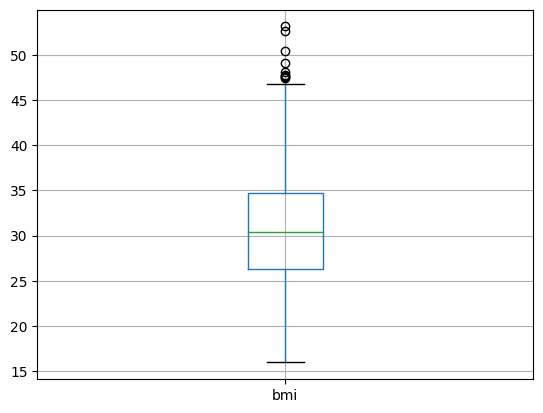

In [62]:
data[["bmi"]].boxplot() # box-plot ИМТ всех наблюдателей

In [63]:
%matplotlib inline

array([[<Axes: title={'center': 'bmi'}>]], dtype=object)

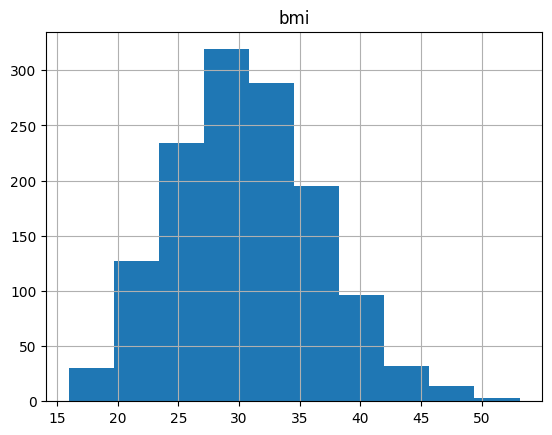

In [64]:
data[["bmi"]].hist() # гистограмма ИМТ для всех наблюдателей

Эмпирическая функция распределения ИМТ для всех наблюдателей:

In [65]:
%matplotlib inline

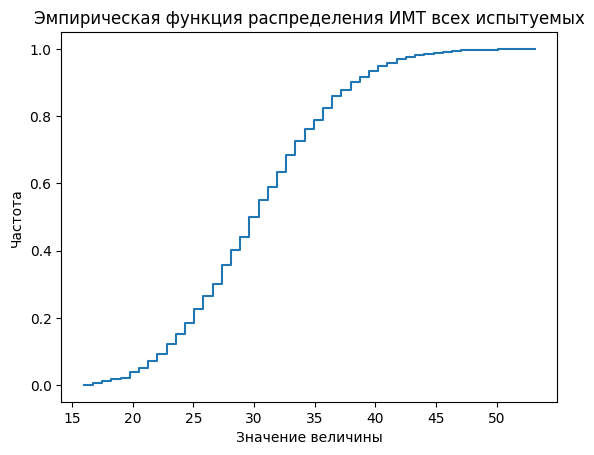

In [66]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

sample = data["bmi"]
ecdf = sm.distributions.ECDF(sample)

x = np.linspace(min(sample), max(sample))
y = ecdf(x)
plt.step(x, y)
plt.xlabel("Значение величины")
plt.ylabel("Частота")
plt.title("Эмпирическая функция распределения ИМТ всех испытуемых")
plt.show()